<a href="https://colab.research.google.com/github/Harshit-tech9/fashion_MNIST_pytorch/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim

In [2]:
# Define a transform to normalize a data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.FashionMNIST('Fashion-MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 17184214.88it/s]


Extracting Fashion-MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303770.25it/s]


Extracting Fashion-MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5484306.71it/s]


Extracting Fashion-MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10817774.04it/s]

Extracting Fashion-MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw



In [16]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

print(labels.unique())

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


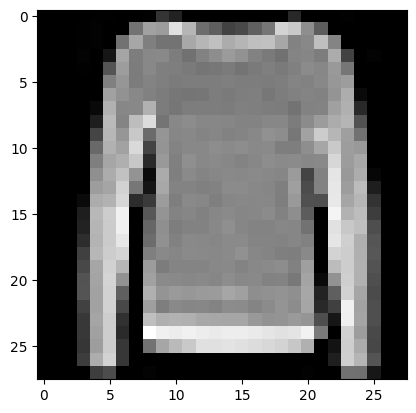

In [4]:
plt.imshow(images[10].numpy().squeeze(), cmap='Greys_r')

In [5]:
class fashion_MNIST(nn.Module):
  def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, output_dim):
    super(fashion_MNIST, self).__init__()

    # hidden layer 1
    self.layer_1 = nn.Linear(input_dim, hidden_dim_1)

    # hidden layer 2
    self.layer_2 = nn.Linear(hidden_dim_2, hidden_dim_3)

    # hidden layer 3
    self.layer_3 = nn.Linear(hidden_dim_3, output_dim)

  def forward(self, x):
    x = F.relu(self.layer_1(x))
    x = F.relu(self.layer_2(x))
    x = F.log_softmax(self.layer_3(x), dim = 1)

    return x

In [6]:
input_dim    = 784
hidden_dim_1 = 392
hidden_dim_2 = 392
hidden_dim_3 = 64
output_dim   = 10

model = fashion_MNIST(input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, output_dim)
print(model)

fashion_MNIST(
  (layer_1): Linear(in_features=784, out_features=392, bias=True)
  (layer_2): Linear(in_features=392, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=10, bias=True)
)


In [10]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epoch = 30

for e in range(epoch):
  mnist_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)

    optimizer.zero_grad()

    logits = model.forward(images)

    loss = criterion(logits, labels)
    loss.backward()
    optimizer.step()

    mnist_loss += loss.item()

  else:
    print(f'Training loss: ', mnist_loss)


Training loss:  254.5990385785699
Training loss:  249.52259080857038
Training loss:  244.562236815691
Training loss:  241.73269740492105
Training loss:  237.89230409637094
Training loss:  234.1889236085117
Training loss:  232.04125487059355
Training loss:  229.48780862987041
Training loss:  226.08829437941313
Training loss:  223.59723852947354
Training loss:  221.19483816623688
Training loss:  218.8635352998972
Training loss:  215.90044117346406
Training loss:  214.39999380335212
Training loss:  211.8000707104802
Training loss:  209.93919283524156
Training loss:  207.6141351237893
Training loss:  205.95431999117136
Training loss:  205.36797614395618
Training loss:  201.6366154961288
Training loss:  199.51083705946803
Training loss:  198.21329921856523
Training loss:  196.0435611717403
Training loss:  194.46902266517282
Training loss:  192.1349584273994
Training loss:  191.65394543111324
Training loss:  190.43846277147532
Training loss:  188.14659966155887
Training loss:  186.7271014675

In [12]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

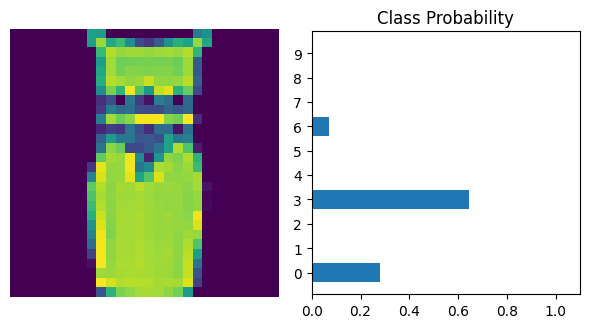

In [14]:
images, labels = next(iter(trainloader))
img = images[10].view(1, 784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
view_classify(img.view(1,28,28), ps)